___

# Pipeline Exploration


check also: https://medium.com/saturdays-ai/my-data-science-template-for-python-59a67cba4290

# Import Libraries

In [104]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # For numerical columns, use histogram, boxplot, and density plot
        plt.subplot(1, 2, 1)
        sns.histplot(df[column_name].dropna(), kde=True, color='skyblue')
        plt.title(f'Histogram of {column_name}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column_name], color='lightgreen')
        plt.title(f'Boxplot of {column_name}')
        
    else:
        # For categorical columns, use bar plot
        sns.countplot(y=df[column_name], palette="viridis", order=df[column_name].value_counts().index)
        plt.title(f'Bar Plot of {column_name}')
        
    plt.tight_layout()
    plt.show()

In [106]:
#Reduce dataframe memory usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [108]:
import pandas as pd

def summarize_dataframe(df):
    summary_list = []  # List to store summary information

    for column in df.columns:
        unique_values = df[column].unique()
        summary_list.append({
            'Column': column,
            'Data Type': df[column].dtype,
            'Unique Values': df[column].nunique(),
            'Missing Values': df[column].isnull().sum(),
            'Sample Unique Values': unique_values[:5] if len(unique_values) > 5 else unique_values
        })

    # Convert the list of dictionaries into a DataFrame
    summary_df = pd.DataFrame(summary_list)

    return summary_df


In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline

In [112]:
import os
print(os.getcwd())
os.chdir(r'C:\Users\Administrator\Desktop\raphi_other\repositories\data-science-project-template\data\01_raw\ml_fundamental_dataset')
print(os.getcwd())

C:\Users\Administrator\Desktop\raphi_other\repositories\data-science-project-template\data\01_raw\ml_fundamental_dataset
C:\Users\Administrator\Desktop\raphi_other\repositories\data-science-project-template\data\01_raw\ml_fundamental_dataset


In [114]:
df = pd.read_csv('train.csv')
df = reduce_mem_usage(df)

Memory usage of dataframe is 0.90 MB
Memory usage after optimization is: 0.16 MB
Decreased by 81.7%


## Do data exploration here first and clean data

#### for data types, cat cardinality and what you want to keep

In [118]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [120]:
print(df.shape)

(1460, 81)


In [122]:
df.describe().round()

C:\Users\Administrator\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Administrator\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Administrator\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.0,57.0,inf,10517.0,6.0,6.0,1971.0,1985.0,inf,444.0,...,94.0,47.0,22.0,3.0,15.0,3.0,43.0,6.0,2008.0,180921.0
std,422.0,42.0,24.0,9981.0,1.0,1.0,30.0,21.0,inf,456.0,...,125.0,66.0,61.0,29.0,56.0,40.0,496.0,3.0,1.0,79443.0
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,366.0,20.0,59.0,7554.0,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.0,50.0,69.0,9478.0,6.0,5.0,1973.0,1994.0,0.0,384.0,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.0,70.0,80.0,11602.0,7.0,6.0,2000.0,2004.0,166.0,712.0,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [124]:
df['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int16   
 1   MSSubClass     1460 non-null   int16   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float16 
 4   LotArea        1460 non-null   int32   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [50]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
columns_to_keep = ['YearRemodAdd', 'KitchenQual']

In [ ]:
df = df[columns_to_keep]

In [74]:
# Generate the summary for your dataframe
summary_df = summarize_dataframe(df)
summary_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

,Column,Data Type,Unique Values,Missing Values,Sample Unique Values
0,Id,int16,1460,0,[1 2 3 4 5]
1,MSSubClass,int16,15,0,[ 60 20 70 50 190]
2,MSZoning,category,5,0,"['RL', 'RM', 'C (all)', 'FV', 'RH'] Categories (5, object): ['C (all)', 'FV', 'RH', 'RL', 'RM']"
3,LotArea,int32,1073,0,[ 8450 9600 11250 9550 14260]
4,Street,category,2,0,"['Pave', 'Grvl'] Categories (2, object): ['Grvl', 'Pave']"
5,LotShape,category,4,0,"['Reg', 'IR1', 'IR2', 'IR3'] Categories (4, object): ['IR1', 'IR2', 'IR3', 'Reg']"
6,LandContour,category,4,0,"['Lvl', 'Bnk', 'Low', 'HLS'] Categories (4, object): ['Bnk', 'HLS', 'Low', 'Lvl']"
7,Utilities,category,2,0,"['AllPub', 'NoSeWa'] Categories (2, object): ['AllPub', 'NoSeWa']"
8,LotConfig,category,5,0,"['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'] Categories (5, object): ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']"
9,LandSlope,category,3,0,"['Gtl', 'Mod', 'Sev'] Categories (3, object): ['Gtl', 'Mod', 'Sev']"


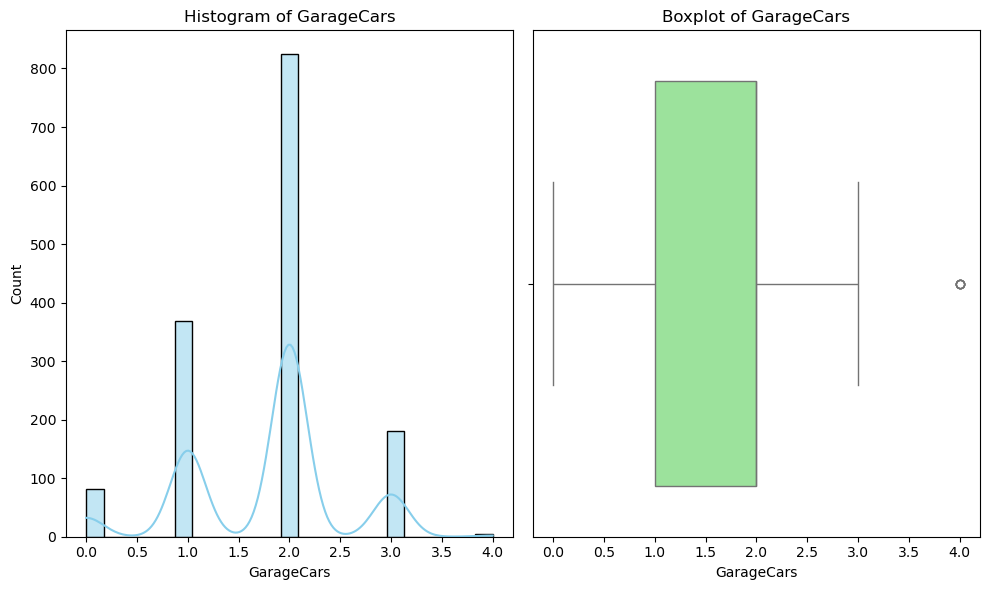

In [58]:
plot_distribution(df, 'GarageCars')

### Drop rows

In [66]:
print(df.shape)
df = df.dropna(axis=1) #axis=0 is row, axis=1 is column
print(df.shape)

(1460, 81)
(1460, 62)


In [142]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
pct = np.percentile(df.loc[:, 'Sales'].fillna(np.mean(df.loc[:, 'Sales'])), 95)
print(pct)
df = df.loc[df.loc[:, 'Sales'] < pct]

In [216]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Select only numerical columns to make correlation matrix

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

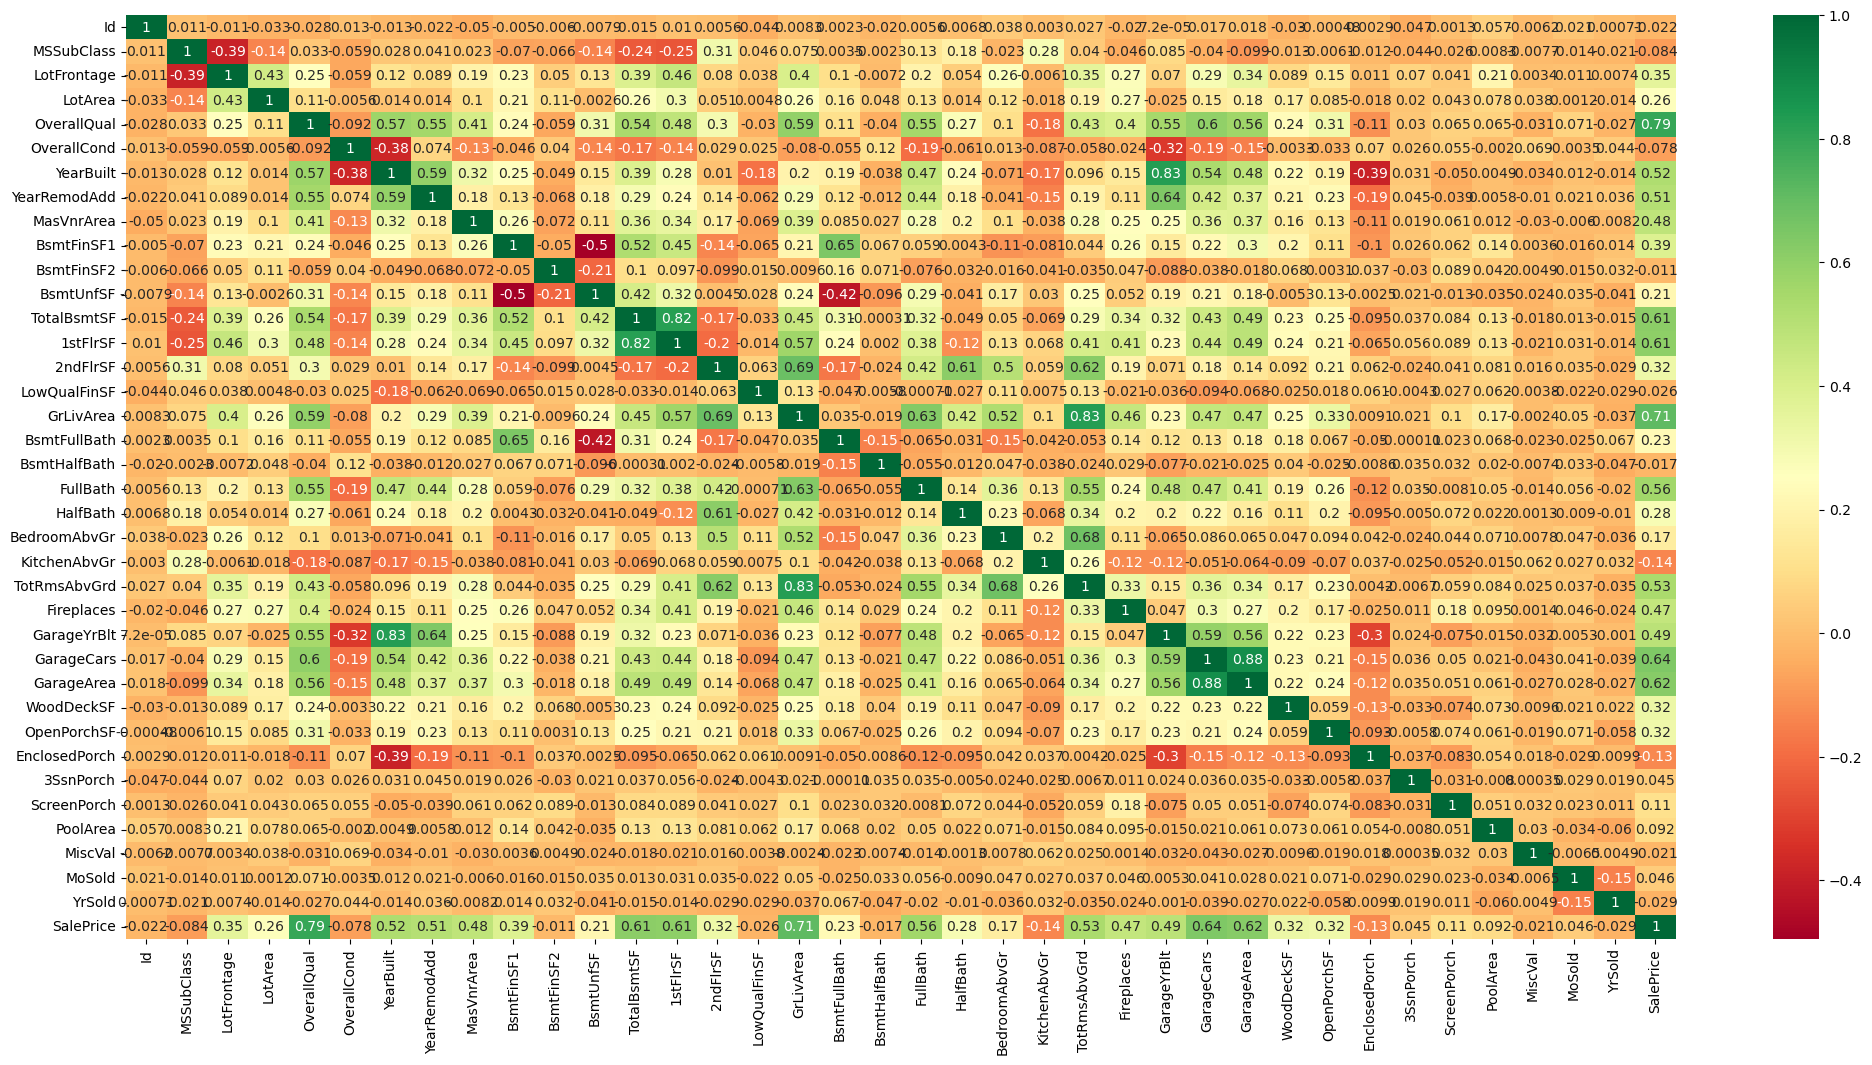

In [198]:
# Select only numerical columns to make correlation matrix

numerical_df = df.select_dtypes(include=[np.number])

numerical_cols = numerical_df.columns

print(numerical_df.head())

print("Numerical Columns:")
print(numerical_df.columns.tolist())
corrmat = numerical_df.corr()   #get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))
g=sns.heatmap(numerical_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")   #plot heat map

In [220]:
meaningful_num_columns = ['what', 'is', 'this']

### For categorical to categorical

In [148]:
categorical_df = df.select_dtypes(include=['category'])
price_df = df['SalePrice']

full_cat_frame = pd.concat([categorical_df, price_df], axis=1)

# Display the resulting DataFrame
print(full_cat_frame.head())

  MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageFinish GarageQual GarageCond PavedDrive  \
0      CollgCr       Norm  ...          RFn         TA         TA          Y   
1      Veenker      Feedr  ...          RFn         TA         TA          Y   
2      CollgCr       Norm  ...          RFn         TA         TA          Y   
3      Crawfor       Norm  ...          Unf         TA         TA          Y   
4      NoRidge       Norm  ...          RFn         TA         TA          Y   

  PoolQC Fence MiscFeature SaleType SaleCondition 

In [166]:
from scipy.stats import chi2_contingency

categorical_cols = [cname for cname in categorical_df.columns if categorical_df[cname].nunique() < 10 and categorical_df[cname].dtype == "category"]
target = df['SaleType']

# Initialize an empty dictionary to store feature and corresponding p-values
chi2_p_values = {}

# Chi-Square test for each categorical feature against the target variable
for column in categorical_df.columns:
    contingency_table = pd.crosstab(categorical_df[column], price_df)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_p_values[column] = p  # Store p-value in the dictionary

# Sort the dictionary based on p-values in ascending order
sorted_chi2_p_values = dict(sorted(chi2_p_values.items(), key=lambda item: item[1]))

# Display the sorted p-values
for feature, p_value in sorted_chi2_p_values.items():
    print(f"Feature: {feature}, p-value: {p_value:.4f}") 


Feature: ExterQual, p-value: 0.0000
Feature: KitchenQual, p-value: 0.0000
Feature: Heating, p-value: 0.0000
Feature: BsmtQual, p-value: 0.0000
Feature: BsmtCond, p-value: 0.0000
Feature: SaleType, p-value: 0.0000
Feature: SaleCondition, p-value: 0.0000
Feature: GarageQual, p-value: 0.0000
Feature: ExterCond, p-value: 0.0000
Feature: LotShape, p-value: 0.0000
Feature: MSZoning, p-value: 0.0000
Feature: GarageFinish, p-value: 0.0000
Feature: Street, p-value: 0.0000
Feature: Neighborhood, p-value: 0.0000
Feature: BsmtExposure, p-value: 0.0000
Feature: Foundation, p-value: 0.0000
Feature: CentralAir, p-value: 0.0000
Feature: FireplaceQu, p-value: 0.0003
Feature: LotConfig, p-value: 0.0458
Feature: Electrical, p-value: 0.0557
Feature: Condition2, p-value: 0.0760
Feature: LandContour, p-value: 0.0867
Feature: LandSlope, p-value: 0.1051
Feature: GarageType, p-value: 0.1325
Feature: MasVnrType, p-value: 0.1519
Feature: Alley, p-value: 0.2097
Feature: MiscFeature, p-value: 0.2378
Feature: PoolQ

In [222]:
meaningful_cat_colums = ['A', 'B']

meaning_ful_col = meaningful_num_columns + meaningful_cat_column

df = df[meaning_ful_col]


NameError: name 'meaningful_cat_column' is not defined

In [170]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### for cat to continous target

In [156]:
from scipy.stats import f_oneway

# ANOVA test for each categorical feature against the target variable
for column in categorical_df.columns:
    feature_dict = {}
    categories = [full_cat_frame[full_cat_frame[column] == cat]['SalePrice'] for cat in full_cat_frame[column].unique()]
    f_stat, p = f_oneway(*categories)
    feature_dict[column] = p
    print(f"Feature: {column}, p-value: {p}")

## Low p-value means significant assiciation with target

Feature: MSZoning, p-value: 8.817633866272648e-35
Feature: Street, p-value: 0.11704860406782483
Feature: Alley, p-value: nan
Feature: LotShape, p-value: 6.447523852011766e-25
Feature: LandContour, p-value: 2.7422167521379096e-08
Feature: Utilities, p-value: 0.5847167739689381
Feature: LotConfig, p-value: 3.163167473604189e-06
Feature: LandSlope, p-value: 0.1413963584114019
Feature: Neighborhood, p-value: 1.558600282771154e-225
Feature: Condition1, p-value: 8.904549416138853e-08
Feature: Condition2, p-value: 0.043425658360948464
Feature: BldgType, p-value: 2.0567364604967015e-10
Feature: HouseStyle, p-value: 3.376776535121222e-25
Feature: RoofStyle, p-value: 3.653523047099125e-17
Feature: RoofMatl, p-value: 7.231444779987188e-08
Feature: Exterior1st, p-value: 2.5860887286376316e-43
Feature: Exterior2nd, p-value: 4.8421856706985465e-43
Feature: MasVnrType, p-value: nan
Feature: ExterQual, p-value: 1.4395510967787893e-204
Feature: ExterCond, p-value: 5.106680608671862e-07
Feature: Foundat

C:\Users\Administrator\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


Feature: BsmtQual, p-value: nan
Feature: BsmtCond, p-value: nan
Feature: BsmtExposure, p-value: nan
Feature: BsmtFinType1, p-value: nan
Feature: BsmtFinType2, p-value: nan
Feature: Heating, p-value: 0.000753472106445497
Feature: HeatingQC, p-value: 2.667062092104357e-67
Feature: CentralAir, p-value: 1.8095061559267854e-22
Feature: Electrical, p-value: nan
Feature: KitchenQual, p-value: 3.0322127528400614e-192
Feature: Functional, p-value: 0.0004841696801078294
Feature: FireplaceQu, p-value: nan
Feature: GarageType, p-value: nan
Feature: GarageFinish, p-value: nan
Feature: GarageQual, p-value: nan
Feature: GarageCond, p-value: nan
Feature: PavedDrive, p-value: 1.803568890651533e-18
Feature: PoolQC, p-value: nan
Feature: Fence, p-value: nan
Feature: MiscFeature, p-value: nan
Feature: SaleType, p-value: 5.039766889462451e-42
Feature: SaleCondition, p-value: 7.988268404991176e-44


In [192]:
print(categorical_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [200]:
print(numerical_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


ValueError: Input X contains NaN.

## Data Loading

In [185]:
# Separate target from predictors
#y = df.SalePrice
#X = df.drop(['SalePrice'], axis=1)

X = df.copy()
y = X.pop("CompressiveStrength")

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "category"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [187]:
my_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### The scoring function

In [202]:
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

#### If you want to first kick everything out

In [208]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

print(cols_with_missing)

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("done")

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
done
MAE from Approach 1 (Drop columns with missing values):


ValueError: could not convert string to float: 'RL'

## Instantiate pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])





# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Model

In [ ]:
from sklearn.metrics import mean_absolute_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)
                             ])

# Preprocessing of training data, fit model 
rf_pipe.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = rf_pipe.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

### Feature Importance

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names after preprocessing
feature_names = rf_pipe.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

### Adding more features

In [ ]:
# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

